# Capítulo 1 - Simulações
## Daniel Lopes de Sousa

O livro-texto provê arquivos em R com as principais funções utilizadas nos exercícios. Estes arquivos encontram-se na pasta r_files neste repositório. Para fins de melhor visualização, tais scripts foram traduzidos para Python quando necessário. Nas simulações dos exercícios a seguir, foram traduzidos os arquivos gamblersruin.r.

## Simulação da Ruína do Apostador

### Descrição do problema

Considere um apostador que tem um montante inicial (stake) de k dólares. Ele repetidamente aposta $1 num jogo em que a probabilidade de ganhar é p e a probabilidade de perder é 1 - p. Os ganhos sucessivos do apostador podem ser representados por um passeio aleatório iniciado em k.

Suponha que o apostador decida parar quando seu ganho atinja um certo valor $n (n > k) ou chegue a 0, o que vier primeiro. Qual é a probabilidade de que o apostador se encontre eventualmente arruinado? Este é o problema clássico da ruína do apostador, primeiro discutido pelos matemáticos Blaise Pascal e Pierre Fermat em 1656. 

### Simulação

O problema é simulado abaixo, com k = 10, n = 40 e p = 0.5.

In [8]:
import numpy as np

def gamble(k, n, p):
  rg = np.random.default_rng()
  stake = k

  while (stake > 0 and stake < n):
    fortuneList.append(int(stake))
    bet = rg.choice([-1,1], 1, replace=False, p=[1-p,p])
    stake += bet
    
  if(stake == 0):
    return 1
  else:
    return 0

Vemos que a função retorna 1 se o apostador atinge a ruína eventualmente e 0 se o apostador consegue atingir o valor n. Nesse caso, temos que a esperança da lista *simlist* gerada representa a probabilidade de que o apostar eventualmente esteja arruinado

In [14]:
import statistics

simulations = 1000
simList = []

for _ in range(0, simulations):
  fortuneList = []
  simList.append(gamble(10, 40, 0.5))
  
mean = statistics.mean(simList)
print('Probabilidade de ruína: ' + str(mean))

Probabilidade de ruína: 0.735


Podemos fazer a simulação do apostador algumas vezes para perceber que, na maioria dos casos, o apostador chega à ruína antes de 1000 iterações de aposta.

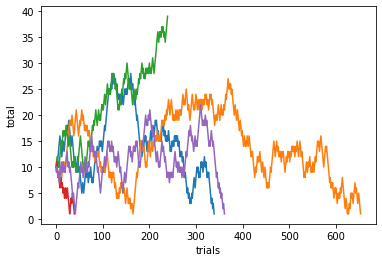

In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

simulations = 5
simList = []

for _ in range(0, simulations):
    fortuneList = []
    simList.append(gamble(10, 40, 0.5))
    
    df = pd.DataFrame(dict(
        trials=list(range(0,len(fortuneList))),
        total=fortuneList))

    sns.lineplot(x="trials", y="total", data=df)

### Exercício 1.35

**a)** Queremos calcular a probabilidade de que o apostador ganhe \$100 antes de atingir a ruína. Nesse caso, temos que ele começa com \$60 e a probabilidade de que ele ganhe uma aposta é 0.5. Temos que a esperança da lista com os resultados de cada aposta nos dá a probabilidade *p* de ruína do apostador. Portanto, o que queremos é o valor *1 - p*.

In [16]:
import statistics
import math
from scipy import stats

simulations = 1000
simList = []

for _ in range(0, simulations):
  fortuneList = []
  simList.append(gamble(60, 100, 0.5))

var = statistics.variance(simList)
mean = statistics.mean(simList)
stdev = statistics.stdev(simList)
print('Probabilidade de ganhar $100: ' + str(1 - mean))
print('Variância : ' + str(var))
print('Intervalo de Confiança da Média (95%): ' + str(stats.norm.interval(0.95, loc=mean, scale = stdev / math.sqrt(len(simList)))))

Probabilidade de ganhar $100: 0.6
Variância : 0.24024024024024027
Intervalo de Confiança da Média (95%): (0.36962117530323885, 0.4303788246967612)


**b)** Da mesma forma que no item a, queremos calcular a probabilidade de que o apostador ganhe \$100 antes de perder tudo. Nessa caso, porém, a probabilidade de ganhar cada rodada é 0.51.

In [17]:
import statistics
import math
from scipy import stats

simulations = 1000
simList = []

for _ in range(0,simulations):
  fortuneList = []
  simList.append(gamble(60, 100, 0.51))

var = statistics.variance(simList)
mean = statistics.mean(simList)
stdev = statistics.stdev(simList)
print('Probabilidade de ganhar $100: ' + str(1 - mean))
print('Variância : ' + str(var))
print('Intervalo de Confiança da Média (95%): ' + str(stats.norm.interval(0.95, loc=mean, scale = stdev / math.sqrt(len(simList)))))

Probabilidade de ganhar $100: 0.922
Variância : 0.07198798798798799
Intervalo de Confiança da Média (95%): (0.06137054145678582, 0.09462945854321418)
